<a href="https://colab.research.google.com/github/Khaliddharif/Fraud-detection-in-international-trade/blob/main/Fraud_detection_in_international_trade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentences Similarty

In [1]:
import pandas as pd
from sentence_transformers import SentenceTransformer, util
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Lists of CN codes and descriptions from the table
cn_codes = ["73041100", "73041910", "73041930", "73041990", "73042200", "73042300", "73042910", "73042930", "73042990", "73051100", "73051200", "73051900", "73052000", "73061100", "73061900", \
            "73062100", "73062900", "82071300", "82071910", "84135000", "84136000", "84138200", "84139200", "84304900", "84313900", "84314300", "84314900", "87052000", "89052000", "89059010"]

descriptions = [
    "Line pipe of a kind used for oil or gas pipelines, seamless, of stainless steel",
    "Line pipe of a kind used for oil or gas pipelines, seamless, of iron or steel, of an external diameter not exceeding 168,3 mm (excl. products of stainless steel or of cast iron)",
    "Line pipe of a kind used for oil or gas pipelines, seamless, of iron or steel, of an external diameter exceeding 168,3 mm but not exceeding 406,4 mm (excl. products of stainless steel or of cast iron)",
    "Line pipe of a kind used for oil or gas pipelines, seamless, of iron or steel, of an external diameter exceeding 406,4 mm (excl. products of stainless steel or of cast iron)",
    "Drill pipe, seamless, of stainless steel, of a kind used in drilling for oil or gas",
    "Drill pipe, seamless, of a kind used in drilling for oil or gas, of iron or steel (excl. products of stainless steel or of cast iron)",
    "Casing and tubing of a kind used for drilling for oil or gas, seamless, of iron or steel, of an external diameter not exceeding 168,3 mm (excl. products of cast iron)",
    "Casing and tubing of a kind used for drilling for oil or gas, seamless, of iron or steel, of an external diameter exceeding 168,3 mm, but not exceeding 406,4 mm (excl. products of cast iron)",
    "Casing and tubing of a kind used for drilling for oil or gas, seamless, of iron or steel, of an external diameter exceeding 406,4 mm (excl. products of cast iron)",
    "Line pipe of a kind used for oil or gas pipelines, having circular cross-sections and an external diameter of exceeding 406,4 mm, of iron or steel, longitudinally submerged arc welded",
    "Line pipe of a kind used for oil or gas pipelines, having circular cross-sections and an external diameter of exceeding 406,4 mm, of iron or steel, longitudinally arc welded (excl. products longitudinally submerged arc welded)",
    "Line pipe of a kind used for oil or gas pipelines, having circular cross-sections and an external diameter of exceeding 406,4 mm, of flat-rolled products of iron or steel (excl. products longitudinally arc welded)",
    "Casing of a kind used in drilling for oil or gas, having circular cross-sections and an external diameter of exceeding 406,4 mm, of flat-rolled products of iron or steel",
    "Line pipe of a kind used for oil or gas pipelines, welded, of flat-rolled products of stainless steel, of an external diameter of not exceeding 406,4 mm",
    "Line pipe of a kind used for oil or gas pipelines, welded, of flat-rolled products of iron or steel, of an external diameter of not exceeding 406,4 mm (excl. products of stainless steel or of cast iron)",
    "Casing and tubing of a kind used in drilling for oil or gas, welded, of flat-rolled products of stainless steel, of an external diameter of not exceeding 406,4 mm",
    "Casing and tubing of a kind used in drilling for oil or gas, welded, of flat-rolled products of iron or steel, of an external diameter of not exceeding 406,4 mm (excl. products of stainless steel or of cast iron)",
    "Rock-drilling or earth-boring tools, interchangeable, with working parts of sintered metal carbides or cermets",
    "Rock-drilling or earth-boring tools, interchangeable, with working parts of diamond or agglomerated diamond",
    "Reciprocating positive displacement pumps for liquids, power-driven (excl. those of subheading 841311 and 841319, fuel, lubricating or cooling medium pumps for internal combustion piston engine and concrete pumps)",
    "Rotary positive displacement pumps for liquids, power-driven (excl. those of subheading 841311 and 841319 and fuel, lubricating or cooling medium pumps for internal combustion piston engine)",
    "Liquid elevators (excl. pumps)",
    "Parts of liquid elevators, n.e.s.",
    "Boring or sinking machinery for boring earth or extracting minerals or ores, not self-propelled and not hydraulic (excl. tunnelling machinery and hand-operated tools)",
    "Parts of machinery of heading 8428, n.e.s.",
    "Parts for boring or sinking machinery of subheading 843041 or 843049, n.e.s.",
    "Parts of machinery of heading 8426, 8429 and 8430, n.e.s.",
    "Mobile drilling derricks",
    "Floating or submersible drilling or production platforms",
    "Sea-going light vessels, fire-floats, floating cranes and other vessels, the navigability of which is subsidiary to their main function (excl. dredgers, floating or submersible drilling or production platforms; fishing vessels and warships)"
]

# Create a DataFrame with CN Code and Description columns
df = pd.DataFrame({
    "CN Code": cn_codes,
    "Description": descriptions
})

# Display the DataFrame
print(df)

     CN Code                                        Description
0   73041100  Line pipe of a kind used for oil or gas pipeli...
1   73041910  Line pipe of a kind used for oil or gas pipeli...
2   73041930  Line pipe of a kind used for oil or gas pipeli...
3   73041990  Line pipe of a kind used for oil or gas pipeli...
4   73042200  Drill pipe, seamless, of stainless steel, of a...
5   73042300  Drill pipe, seamless, of a kind used in drilli...
6   73042910  Casing and tubing of a kind used for drilling ...
7   73042930  Casing and tubing of a kind used for drilling ...
8   73042990  Casing and tubing of a kind used for drilling ...
9   73051100  Line pipe of a kind used for oil or gas pipeli...
10  73051200  Line pipe of a kind used for oil or gas pipeli...
11  73051900  Line pipe of a kind used for oil or gas pipeli...
12  73052000  Casing of a kind used in drilling for oil or g...
13  73061100  Line pipe of a kind used for oil or gas pipeli...
14  73061900  Line pipe of a kind used f

In [5]:
df

,CN Code,Description
0,73041100,Line pipe of a kind used for oil or gas pipeli...
1,73041910,Line pipe of a kind used for oil or gas pipeli...
2,73041930,Line pipe of a kind used for oil or gas pipeli...
3,73041990,Line pipe of a kind used for oil or gas pipeli...
4,73042200,"Drill pipe, seamless, of stainless steel, of a..."
5,73042300,"Drill pipe, seamless, of a kind used in drilli..."
6,73042910,Casing and tubing of a kind used for drilling ...
7,73042930,Casing and tubing of a kind used for drilling ...
8,73042990,Casing and tubing of a kind used for drilling ...
9,73051100,Line pipe of a kind used for oil or gas pipeli...


In [3]:
# Load the model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# Your input text
your_text = "drilling derricks"

In [ ]:
# Debugging: Check if descriptions are being passed
description_list = df["Description"].tolist()
print("\nNumber of descriptions:", len(description_list))
print("First description:", description_list[0] if description_list else "No descriptions found")


Number of descriptions: 30
First description: Line pipe of a kind used for oil or gas pipelines, seamless, of stainless steel


In [ ]:
# Encode your text and the descriptions
your_embedding = model.encode(your_text, convert_to_tensor=True)
description_embeddings = model.encode(description_list, convert_to_tensor=True)

# Debugging: Check embedding shapes
print("\nYour embedding shape:", your_embedding.shape)
print("Description embeddings shape:", description_embeddings.shape)

# Compute cosine similarity scores
cosine_scores = util.cos_sim(your_embedding, description_embeddings)[0]

# Add similarity scores to the DataFrame
df["Similarity_Score"] = cosine_scores.tolist()

# Sort by similarity score (highest first)
df_sorted = df.sort_values(by="Similarity_Score", ascending=False)

# Display the top results
print(f"\nInput Text: {your_text}")
print("\nTop Similar Descriptions:")
print(df_sorted[["CN Code", "Similarity_Score"]].head())



Your embedding shape: torch.Size([384])
Description embeddings shape: torch.Size([30, 384])

Input Text: drilling derricks

Top Similar Descriptions:
     CN Code  Similarity_Score
27  87052000          0.888937
28  89052000          0.476835
17  82071300          0.461836
4   73042200          0.461302
5   73042300          0.458649


In [ ]:
df_sorted

,CN Code,Description,Similarity_Score
27,87052000,Mobile drilling derricks,0.888937
28,89052000,Floating or submersible drilling or production...,0.476835
17,82071300,"Rock-drilling or earth-boring tools, interchan...",0.461836
4,73042200,"Drill pipe, seamless, of stainless steel, of a...",0.461302
5,73042300,"Drill pipe, seamless, of a kind used in drilli...",0.458649
6,73042910,Casing and tubing of a kind used for drilling ...,0.457056
7,73042930,Casing and tubing of a kind used for drilling ...,0.453603
18,82071910,"Rock-drilling or earth-boring tools, interchan...",0.452709
8,73042990,Casing and tubing of a kind used for drilling ...,0.445736
15,73062100,Casing and tubing of a kind used in drilling f...,0.427153


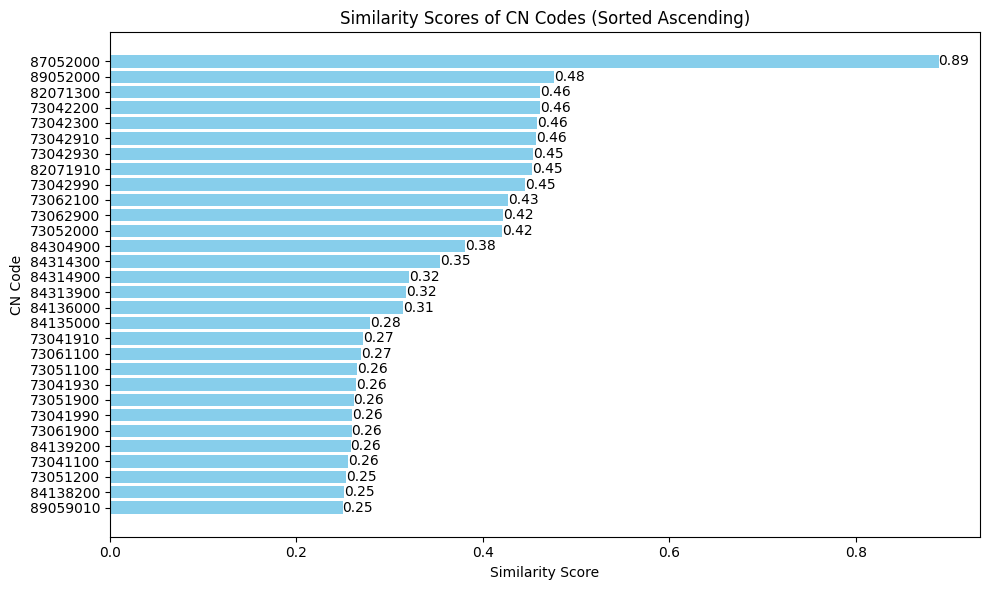

In [ ]:
# Sort the dataframe by Similarity_Score in ascending order
df_sorted = df_sorted.sort_values(by='Similarity_Score', ascending=True)

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.barh(df_sorted['CN Code'], df_sorted['Similarity_Score'], color='skyblue')
plt.xlabel("Similarity Score")
plt.ylabel("CN Code")
plt.title("Similarity Scores of CN Codes (Sorted Ascending)")

# Add score values inside the bars
for i, v in enumerate(df_sorted['Similarity_Score']):
    plt.text(v, i, f"{v:.2f}", color='black', va='center')

plt.tight_layout()
plt.show()


# Please once you get results from the first model, restart the Runtime session before running the Fine tunned BERT Model.

# Fine tunning BERT model

In [ ]:
!pip install pandas sentence-transformers torch
!pip install datasets
!pip install datasets
!pip install pandas sentence-transformers torch datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer, InputExample, losses, util
from torch.utils.data import DataLoader
from datasets import Dataset
import torch
import random
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
# Disable W&B logging
os.environ["WANDB_MODE"] = "disabled"

In [ ]:
# Step 1: Define Illicit Products Dataframe
illicit_cn_codes = [
    "73041100", "73041910", "73041930", "73041990", "73042200", "73042300", "73042910",
    "73042930", "73042990", "73051100", "73051200", "73051900", "73052000", "73061100",
    "73061900", "73062100", "73062900", "82071300", "82071910", "84135000", "84136000",
    "84138200", "84139200", "84304900", "84313900", "84314300", "84314900",
    "87052000", "89052000", "89059010"
]

illicit_descriptions = [
    "Line pipe of a kind used for oil or gas pipelines, seamless, of stainless steel",
    "Line pipe of a kind used for oil or gas pipelines, seamless, of iron or steel, of an external diameter not exceeding 168,3 mm (excl. products of stainless steel or of cast iron)",
    "Line pipe of a kind used for oil or gas pipelines, seamless, of iron or steel, of an external diameter exceeding 168,3 mm but not exceeding 406,4 mm (excl. products of stainless steel or of cast iron)",
    "Line pipe of a kind used for oil or gas pipelines, seamless, of iron or steel, of an external diameter exceeding 406,4 mm (excl. products of stainless steel or of cast iron)",
    "Drill pipe, seamless, of stainless steel, of a kind used in drilling for oil or gas",
    "Drill pipe, seamless, of a kind used in drilling for oil or gas, of iron or steel (excl. products of stainless steel or of cast iron)",
    "Casing and tubing of a kind used for drilling for oil or gas, seamless, of iron or steel, of an external diameter not exceeding 168,3 mm (excl. products of cast iron)",
    "Casing and tubing of a kind used for drilling for oil or gas, seamless, of iron or steel, of an external diameter exceeding 168,3 mm, but not exceeding 406,4 mm (excl. products of cast iron)",
    "Casing and tubing of a kind used for drilling for oil or gas, seamless, of iron or steel, of an external diameter exceeding 406,4 mm (excl. products of cast iron)",
    "Line pipe of a kind used for oil or gas pipelines, having circular cross-sections and an external diameter of exceeding 406,4 mm, of iron or steel, longitudinally submerged arc welded",
    "Line pipe of a kind used for oil or gas pipelines, having circular cross-sections and an external diameter of exceeding 406,4 mm, of iron or steel, longitudinally arc welded (excl. products longitudinally submerged arc welded)",
    "Line pipe of a kind used for oil or gas pipelines, having circular cross-sections and an external diameter of exceeding 406,4 mm, of flat-rolled products of iron or steel (excl. products longitudinally arc welded)",
    "Casing of a kind used in drilling for oil or gas, having circular cross-sections and an external diameter of exceeding 406,4 mm, of flat-rolled products of iron or steel",
    "Line pipe of a kind used for oil or gas pipelines, welded, of flat-rolled products of stainless steel, of an external diameter of not exceeding 406,4 mm",
    "Line pipe of a kind used for oil or gas pipelines, welded, of flat-rolled products of iron or steel, of an external diameter of not exceeding 406,4 mm (excl. products of stainless steel or of cast iron)",
    "Casing and tubing of a kind used in drilling for oil or gas, welded, of flat-rolled products of stainless steel, of an external diameter of not exceeding 406,4 mm",
    "Casing and tubing of a kind used in drilling for oil or gas, welded, of flat-rolled products of iron or steel, of an external diameter of not exceeding 406,4 mm (excl. products of stainless steel or of cast iron)",
    "Rock-drilling or earth-boring tools, interchangeable, with working parts of sintered metal carbides or cermets",
    "Rock-drilling or earth-boring tools, interchangeable, with working parts of diamond or agglomerated diamond",
    "Reciprocating positive displacement pumps for liquids, power-driven (excl. those of subheading 841311 and 841319, fuel, lubricating or cooling medium pumps for internal combustion piston engine and concrete pumps)",
    "Rotary positive displacement pumps for liquids, power-driven (excl. those of subheading 841311 and 841319 and fuel, lubricating or cooling medium pumps for internal combustion piston engine)",
    "Liquid elevators (excl. pumps)",
    "Parts of liquid elevators, n.e.s.",
    "Boring or sinking machinery for boring earth or extracting minerals or ores, not self-propelled and not hydraulic (excl. tunnelling machinery and hand-operated tools)",
    "Parts of machinery of heading 8428, n.e.s.",
    "Parts for boring or sinking machinery of subheading 843041 or 843049, n.e.s.",
    "Parts of machinery of heading 8426, 8429 and 8430, n.e.s.",
    "Mobile drilling derricks",
    "Floating or submersible drilling or production platforms",
    "Sea-going light vessels, fire-floats, floating cranes and other vessels, the navigability of which is subsidiary to their main function (excl. dredgers, floating or submersible drilling or production platforms; fishing vessels and warships)"
]

# Illicit Products DataFrame
illicit_df = pd.DataFrame({
    "CN Code": illicit_cn_codes,
    "Description": illicit_descriptions,
    "Category": "Illicit Products"
})

# Step 2: Define Allowed Products Dataframe
allowed_cn_codes = [
    "10019900",  # Wheat and meslin
    "31021000",  # Urea (fertilizer)
    "30049000",  # Medicaments in doses
    "90189084",  # Medical instruments
    "63014090",  # Synthetic blankets
    "62046231"   # Women’s cotton trousers
]

allowed_descriptions = [
    "Processed and unprocessed food items, including grains, dairy, and meat",
    "Fertilizers, seeds, and other agricultural inputs not restricted by sanctions",
    "Medicines and pharmaceutical products for health care",
    "Medical equipment and devices for hospitals and personal use",
    "Goods for emergency relief, such as blankets and hygiene products",
    "Everyday consumer items like clothing and household goods (non-luxury)"
]

# Allowed Products DataFrame
allowed_df = pd.DataFrame({
    "CN Code": allowed_cn_codes,
    "Description": allowed_descriptions,
    "Category": "Allowed Products"
})

# Step 3: Combine the DataFrames
combined_df = pd.concat([illicit_df, allowed_df], ignore_index=True)

In [ ]:
combined_df

,CN Code,Description,Category
0,73041100,Line pipe of a kind used for oil or gas pipeli...,Illicit Products
1,73041910,Line pipe of a kind used for oil or gas pipeli...,Illicit Products
2,73041930,Line pipe of a kind used for oil or gas pipeli...,Illicit Products
3,73041990,Line pipe of a kind used for oil or gas pipeli...,Illicit Products
4,73042200,"Drill pipe, seamless, of stainless steel, of a...",Illicit Products
5,73042300,"Drill pipe, seamless, of a kind used in drilli...",Illicit Products
6,73042910,Casing and tubing of a kind used for drilling ...,Illicit Products
7,73042930,Casing and tubing of a kind used for drilling ...,Illicit Products
8,73042990,Casing and tubing of a kind used for drilling ...,Illicit Products
9,73051100,Line pipe of a kind used for oil or gas pipeli...,Illicit Products


In [ ]:
# Step 4: Generate Synthetic Training Data (using illicit descriptions for fine-tuning)
train_examples = []

# Positive pairs (similar illicit descriptions)
for i in range(len(illicit_descriptions)):
    for j in range(i + 1, len(illicit_descriptions)):
        if "seamless" in illicit_descriptions[i] and "seamless" in illicit_descriptions[j]:
            train_examples.append(InputExample(texts=[illicit_descriptions[i], illicit_descriptions[j]], label=0.9))
        elif "pipe" in illicit_descriptions[i] and "pipe" in illicit_descriptions[j]:
            train_examples.append(InputExample(texts=[illicit_descriptions[i], illicit_descriptions[j]], label=0.7))

# Negative pairs (dissimilar illicit descriptions)
for i in range(len(illicit_descriptions)):
    for j in range(i + 1, len(illicit_descriptions)):
        if "pipe" in illicit_descriptions[i] and "platform" in illicit_descriptions[j]:
            train_examples.append(InputExample(texts=[illicit_descriptions[i], illicit_descriptions[j]], label=0.1))
        elif "tool" in illicit_descriptions[i] and "pump" in illicit_descriptions[j]:
            train_examples.append(InputExample(texts=[illicit_descriptions[i], illicit_descriptions[j]], label=0.2))

# Shuffle the training examples
random.shuffle(train_examples)
print(f"Generated {len(train_examples)} training examples.")

# Step 5: Load and Fine-Tune the BERT-based Model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

# Create DataLoader for training
train_dataloader = DataLoader(train_examples, shuffle=True, batch_size=16)

# Define the contrastive loss function
train_loss = losses.ContrastiveLoss(model=model)

# Fine-tune the model
model.fit(
    train_objectives=[(train_dataloader, train_loss)],
    epochs=4,
    warmup_steps=100,
    output_path="fine_tuned_minilm_combined",
    show_progress_bar=True
)

print("Model fine-tuning complete. Saved to 'fine_tuned_minilm_combined'.")

Generated 104 training examples.


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Computing widget examples:   0%|          | 0/1 [00:00<?, ?example/s]

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


Step,Training Loss


Model fine-tuning complete. Saved to 'fine_tuned_minilm_combined'.


In [ ]:
# Step 6: Inference with the Fine-Tuned Model (here you can past your extracted text from OCR to check)
your_text = "drilling derricks"

In [ ]:
# Encode your text and the combined descriptions
your_embedding = model.encode(your_text, convert_to_tensor=True)
description_embeddings = model.encode(combined_df["Description"].tolist(), convert_to_tensor=True)

# Compute cosine similarity scores
cosine_scores = util.cos_sim(your_embedding, description_embeddings)[0]

# Add similarity scores to the combined DataFrame
combined_df["Similarity_Score"] = cosine_scores.tolist()

# Sort by similarity score (highest first)
combined_df_sorted = combined_df.sort_values(by="Similarity_Score", ascending=False)

# Display the results
print(f"\nInput Text: {your_text}")
print("\nTop 5 Similar Descriptions (Illicit and Allowed Products):")
print(combined_df_sorted[["CN Code", "Description", "Category", "Similarity_Score"]].head())


Input Text: drilling derricks

Top 5 Similar Descriptions (Illicit and Allowed Products):
     CN Code                                        Description  \
27  87052000                           Mobile drilling derricks   
28  89052000  Floating or submersible drilling or production...   
17  82071300  Rock-drilling or earth-boring tools, interchan...   
6   73042910  Casing and tubing of a kind used for drilling ...   
7   73042930  Casing and tubing of a kind used for drilling ...   

            Category  Similarity_Score  
27  Illicit Products          0.897127  
28  Illicit Products          0.543569  
17  Illicit Products          0.539691  
6   Illicit Products          0.531908  
7   Illicit Products          0.531583  


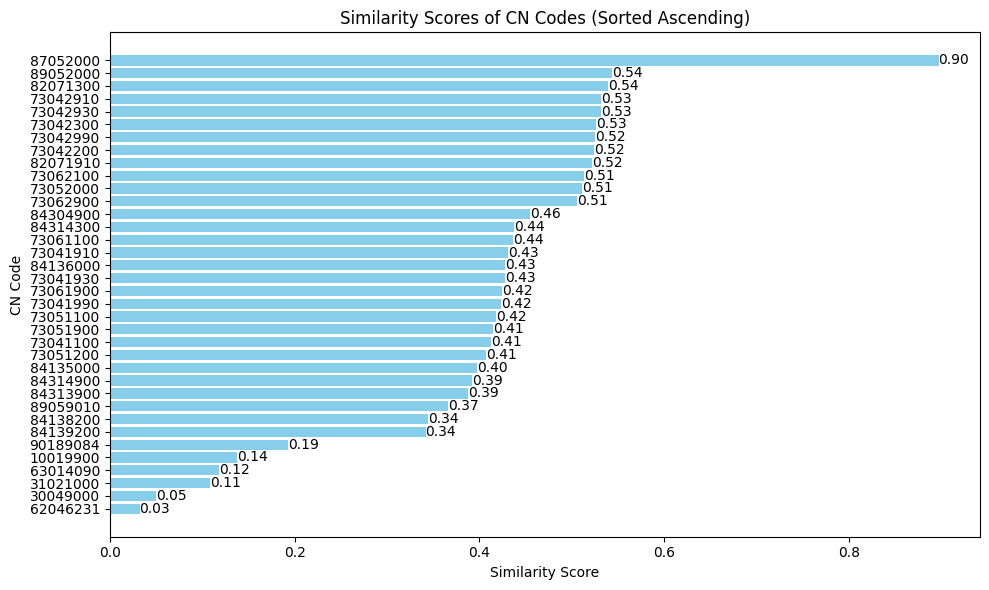

In [ ]:
# Sort the dataframe by Similarity_Score in ascending order
combined_df_sorted = combined_df_sorted.sort_values(by='Similarity_Score', ascending=True)

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.barh(combined_df_sorted['CN Code'], combined_df_sorted['Similarity_Score'], color='skyblue')
plt.xlabel("Similarity Score")
plt.ylabel("CN Code")
plt.title("Similarity Scores of CN Codes (Sorted Ascending)")

# Add score values inside the bars
for i, v in enumerate(combined_df_sorted['Similarity_Score']):
    plt.text(v, i, f"{v:.2f}", color='black', va='center')

plt.tight_layout()
plt.show()


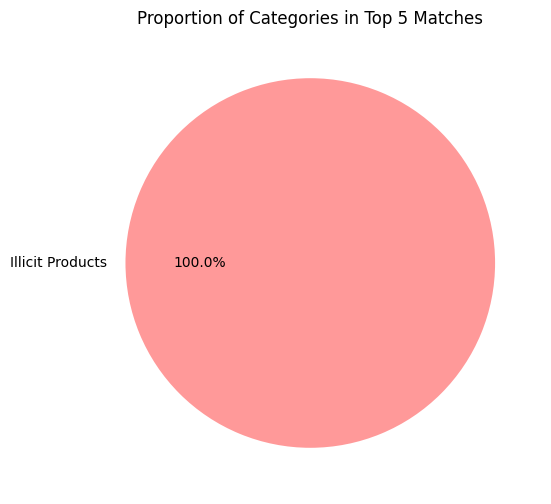

In [ ]:
# Pie Chart: Proportion of Illicit vs. Allowed Products in Top Matches
top_n = 5
top_df = combined_df.sort_values(by="Similarity_Score", ascending=False).head(top_n)
category_counts = top_df["Category"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'])
plt.title(f"Proportion of Categories in Top {top_n} Matches")
plt.show()

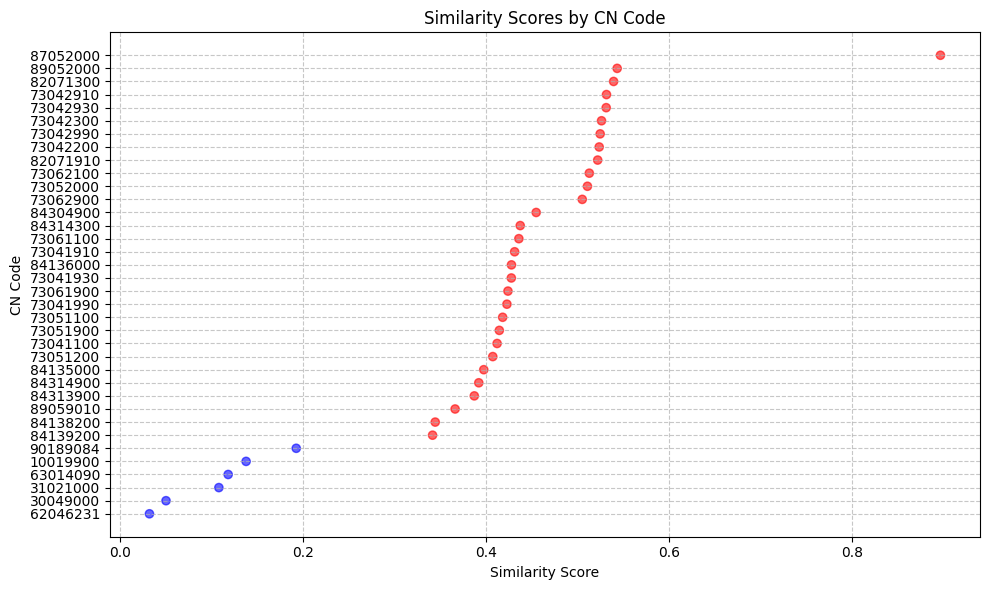

In [ ]:
# Scatter Plot: Similarity Scores vs. CN Codes
plt.figure(figsize=(10, 6))
colors = {'Illicit Products': 'red', 'Allowed Products': 'blue'}
plt.scatter(combined_df_sorted["Similarity_Score"], combined_df_sorted["CN Code"],
            c=combined_df_sorted["Category"].map(colors), alpha=0.6)
plt.xlabel("Similarity Score")
plt.ylabel("CN Code")
plt.title("Similarity Scores by CN Code")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

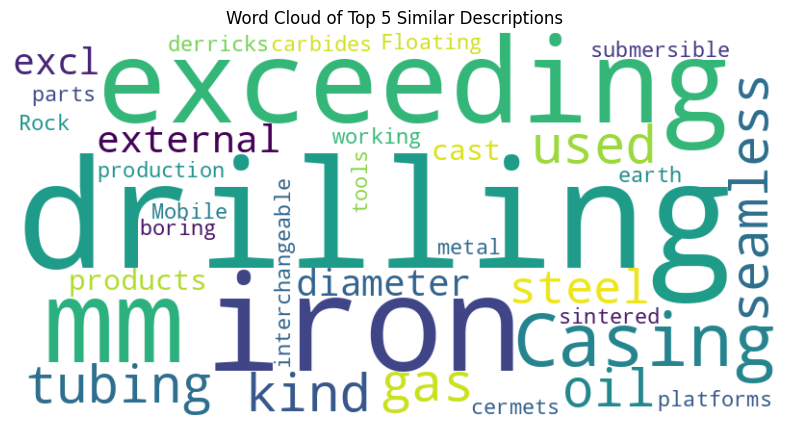

In [ ]:
# Word Cloud: Keywords in Top Similar Descriptions
top_n = 5
top_descriptions = " ".join(combined_df.sort_values(by="Similarity_Score", ascending=False)
                           .head(top_n)["Description"].tolist())

wordcloud = WordCloud(width=800, height=400, background_color='white',
                      min_font_size=10).generate(top_descriptions)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(f"Word Cloud of Top {top_n} Similar Descriptions")
plt.show()

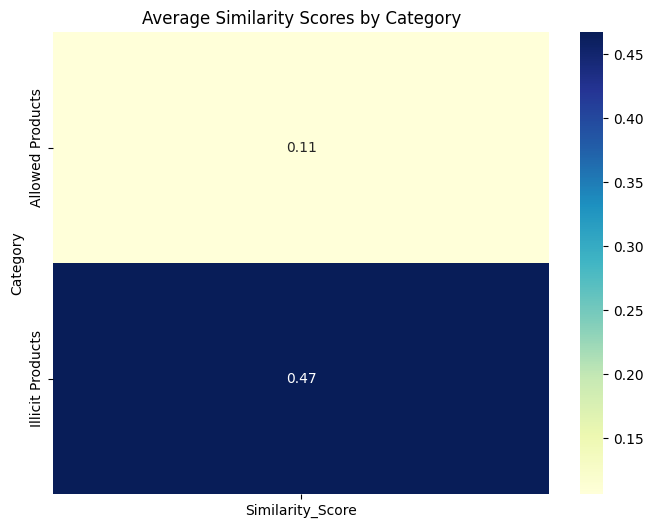

In [ ]:
# Heatmap: Similarity Scores Across Categories
import seaborn as sns
import numpy as np

plt.figure(figsize=(8, 6))
avg_scores = combined_df.groupby("Category")["Similarity_Score"].mean().reset_index()
pivot_data = avg_scores.pivot_table(index="Category", values="Similarity_Score")
sns.heatmap(pivot_data, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Average Similarity Scores by Category")
plt.show()